# Development Environment: Evaluating Model Performance

Area 1: Initial functional tests

## Area 1: Initial Functional Tests

Evaluating model basic functionality and results to see where logical improvements need to be made and mistakes were created. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib as mpl
import numpy as np
from matplotlib.lines import Line2D

In [2]:
# Model Results  
data = pd.read_csv('../src/results.tsv', sep = '\t', header=0, index_col = False)

### LR-Data Evaluation:

the following is specifically for evaluating functionality of the Ligand-Receptor Model in SingleCell/tests

/tmp/ipykernel_14888/516045876.py:117: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


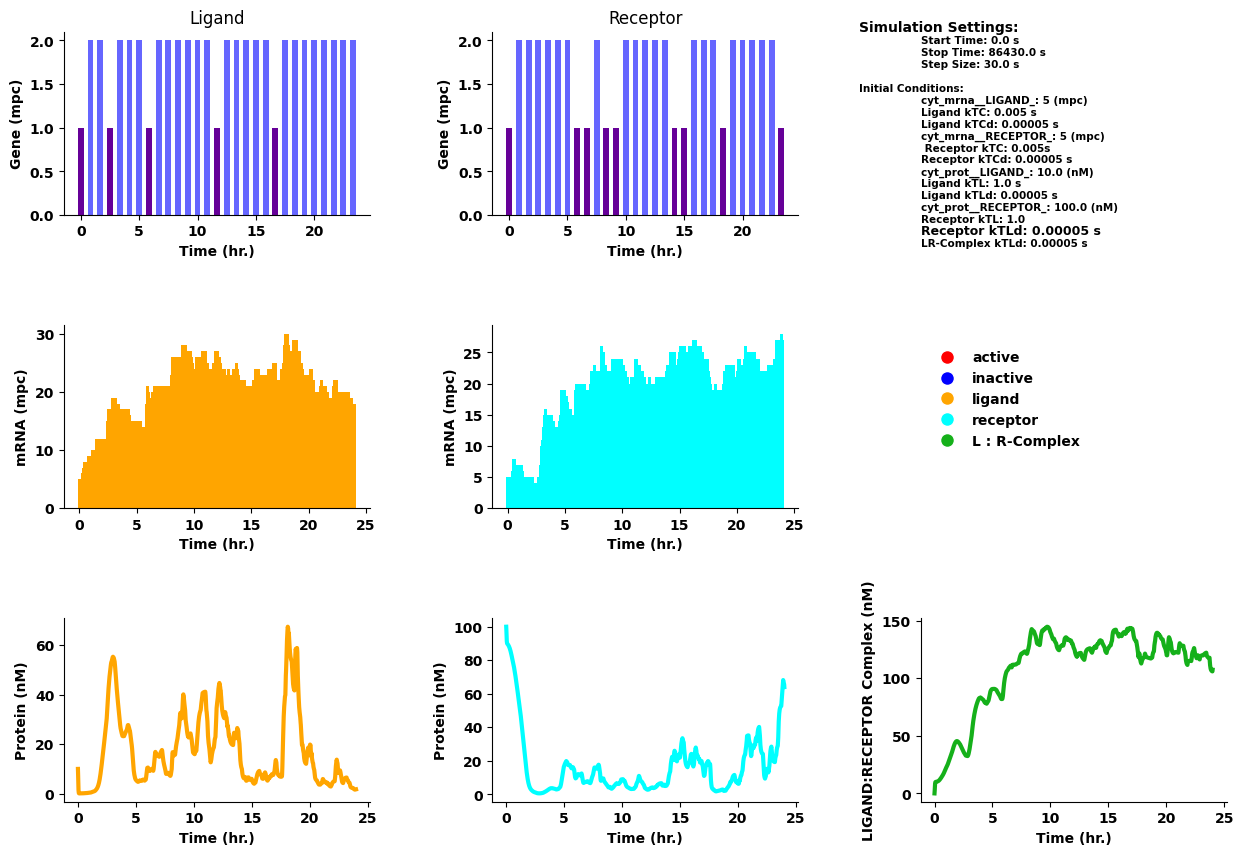

<Figure size 640x480 with 0 Axes>

In [3]:
headers = [
    'nuc_gene_a__LIGAND_',
    'nuc_gene_i__LIGAND_',
    'nuc_gene_a__RECEPTOR_',
    'nuc_gene_i__RECEPTOR_',
    'cyt_mrna__LIGAND_',
    'cyt_mrna__RECEPTOR_',
    'cyt_prot__LIGAND_',
    'cyt_prot__RECEPTOR_',
    'cyt_prot__LIGAND__RECEPTOR_'
]

fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(3, 3, figure=fig, hspace=0.6, wspace=0.4)

# mpl.rcParams['font.size'] = 16
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['axes.labelweight'] = 'bold'
mpl.rcParams['lines.linewidth'] = 3


stop = len(data.index)* 30.0
step = stop / len(data.index)

time = np.arange(0.0, stop, step)
start = time[0]
cyt_gene_a__ligand_init = data[headers[0]]
cyt_gene_a__receptor_init = data[headers[2]]
cyt_mrna_ligand_init = data[headers[4]][0]
cyt_mrna_receptor_init = data[headers[5]][0]
cyt_prot_ligand_init = data[headers[6]][0]
cyt_prot_receptor_init = data[headers[7]][0]

# === Top row (Bar plots comparing pairs) ===
ax1_0 = fig.add_subplot(gs[0, 0])
ax1_0.bar(time[::100]/3600, data[headers[0]][::100], color='red', label=headers[0], width=0.5)
ax1_0.bar(time[::100]/3600, data[headers[1]][::100], color='blue', alpha=0.6, label=headers[1], width=0.5)
ax1_0.set_title("Ligand")
ax1_0.set_ylabel("Gene (mpc)")
ax1_0.set_xlabel('Time (hr.)')
# ax1_0.legend(frameon = False)

ax1_1 = fig.add_subplot(gs[0, 1])
ax1_1.bar(time[::100]/3600, data[headers[2]][::100], color='red', label=headers[2], width=0.5)
ax1_1.bar(time[::100]/3600, data[headers[3]][::100], color='blue', alpha=0.6, label=headers[3], width=0.5)
ax1_1.set_title("Receptor")
ax1_1.set_ylabel("Gene (mpc)")
ax1_1.set_xlabel('Time (hr.)')
# ax1_1.legend(frameon = False, )

# === Middle row (Single line plots) ===
ax2_0 = fig.add_subplot(gs[1, 0])
ax2_0.bar(time/3600, data[headers[4]], color='orange', width=0.25)
ax2_0.set_ylabel("mRNA (mpc)")
ax2_0.set_xlabel('Time (hr.)')

ax2_1 = fig.add_subplot(gs[1, 1])
ax2_1.bar(time/3600, data[headers[5]], color='cyan', width=0.25)
ax2_1.set_ylabel("mRNA (mpc)")
ax2_1.set_xlabel('Time (hr.)')

# === Bottom row (Line plots) ===
ax3_0 = fig.add_subplot(gs[2, 0])  # Span full row
ax3_1 = fig.add_subplot(gs[2, 1])
ax3_2 = fig.add_subplot(gs[2, 2])
ax3_0.plot(time/3600, data[headers[6]], color='orange', label=headers[6])
ax3_0.set_ylabel("Protein (nM)")
ax3_0.set_xlabel('Time (hr.)')
ax3_1.plot(time/3600, data[headers[7]], color='cyan', label=headers[7])
ax3_1.set_ylabel("Protein (nM)")
ax3_1.set_xlabel('Time (hr.)')
ax3_2.plot(time/3600, data[headers[8]], color='#15b01a', label=headers[8])
ax3_2.set_ylabel("LIGAND:RECEPTOR Complex (nM)")
ax3_2.set_xlabel('Time (hr.)')

ax1_2 = fig.add_subplot(gs[0:2, 2])

ax1_2.text(-0.2, 1.0, "Simulation Settings: ", fontsize = 10)
ax1_2.text(0.0, 0.975, f"Start Time: {start} s", fontsize =7.5)
ax1_2.text(0.0, 0.95,f"Stop Time: {stop} s", fontsize = 7.5)
ax1_2.text(0.0, 0.925,f"Step Size: {step} s", fontsize = 7.5)

ax1_2.text(-0.2, 0.875, "Initial Conditions:", fontsize=7.5)
ax1_2.text(0.0, 0.85,f"cyt_mrna__LIGAND_: {cyt_mrna_ligand_init} (mpc)", fontsize = 7.5)
ax1_2.text(0.0, 0.825, "Ligand kTC: 0.005 s", fontsize=7.5)
ax1_2.text(0.0, 0.8, "Ligand kTCd: 0.00005 s", fontsize=7.5)
ax1_2.text(0.0, 0.775,f"cyt_mrna__RECEPTOR_: {cyt_mrna_receptor_init} (mpc)", fontsize = 7.5)
ax1_2.text(0.0, 0.75, " Receptor kTC: 0.005s", fontsize=7.5)
ax1_2.text(0.0, 0.725, "Receptor kTCd: 0.00005 s", fontsize=7.5)
ax1_2.text(0.0, 0.7, f"cyt_prot__LIGAND_: {cyt_prot_ligand_init} (nM)", fontsize=7.5)
ax1_2.text(0.0, 0.675, "Ligand kTL: 1.0 s", fontsize=7.5)
ax1_2.text(0.0, 0.65, "Ligand kTLd: 0.00005 s", fontsize=7.5)
ax1_2.text(0.0, 0.625, f"cyt_prot__RECEPTOR_: {cyt_prot_receptor_init} (nM)", fontsize=7.5)
ax1_2.text(0.0, 0.6, "Receptor kTL: 1.0", fontsize=7.5)
ax1_2.text(0.0, 0.575, "Receptor kTLd: 0.00005 s", fontsize=9)
ax1_2.text(0.0, 0.55, "LR-Complex kTLd: 0.00005 s", fontsize=7.5)

ax1_2.axis('off')

# Custom legend elements
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='active', markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='inactive', markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='ligand', markerfacecolor='orange', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='receptor', markerfacecolor='cyan', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='L : R-Complex', markerfacecolor='#15b01a', markersize=10)
]

# Add legend manually to ax1_2
ax1_2.legend(handles=legend_elements, loc='lower left', bbox_to_anchor=(0, 0.10), frameon=False, fontsize=10)


sns.despine(fig)

# Final touches
# fig.suptitle("Gene Expression and Interaction Overview", fontsize=16, y=0.95)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
plt.savefig(fname = "/home/jonah/Desktop/sim-results/LR-Model.png", dpi = 300)

## 10-Fold Increase Analysis

Analyzing both cumulative output of 10-fold increase of kTC's, and respective species trajectories

In [4]:
increase = pd.read_csv("../src/increase-10-fold-kTC-results.tsv", sep = '\t', header=0)

/tmp/ipykernel_14888/2222761402.py:116: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


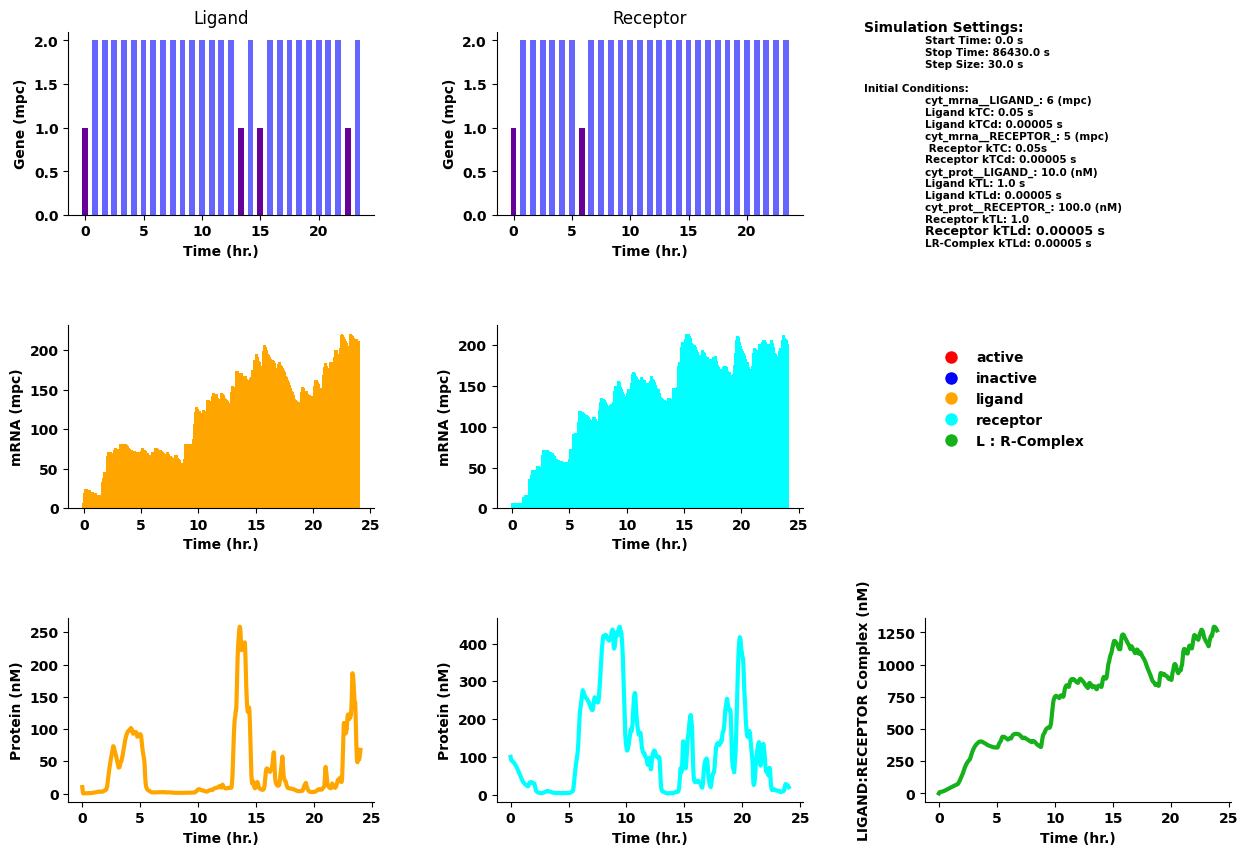

<Figure size 640x480 with 0 Axes>

In [5]:
headers = [
    'nuc_gene_a__LIGAND_',
    'nuc_gene_i__LIGAND_',
    'nuc_gene_a__RECEPTOR_',
    'nuc_gene_i__RECEPTOR_',
    'cyt_mrna__LIGAND_',
    'cyt_mrna__RECEPTOR_',
    'cyt_prot__LIGAND_',
    'cyt_prot__RECEPTOR_',
    'cyt_prot__LIGAND__RECEPTOR_'
]

fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(3, 3, figure=fig, hspace=0.6, wspace=0.4)

# mpl.rcParams['font.size'] = 16
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['axes.labelweight'] = 'bold'
mpl.rcParams['lines.linewidth'] = 3

stop = len(data.index)* 30.0
step = stop / len(data.index)

time = increase["index"]
start = time[0]
cyt_gene_a__ligand_init = increase[headers[0]]
cyt_gene_a__receptor_init = increase[headers[2]]
cyt_mrna_ligand_init = increase[headers[4]][0]
cyt_mrna_receptor_init = increase[headers[5]][0]
cyt_prot_ligand_init = increase[headers[6]][0]
cyt_prot_receptor_init = increase[headers[7]][0]

# === Top row (Bar plots comparing pairs) ===
ax1_0 = fig.add_subplot(gs[0, 0])
ax1_0.bar(time[::100]/3600, increase[headers[0]][::100], color='red', label=headers[0], width=0.5)
ax1_0.bar(time[::100]/3600, increase[headers[1]][::100], color='blue', alpha=0.6, label=headers[1], width=0.5)
ax1_0.set_title("Ligand")
ax1_0.set_ylabel("Gene (mpc)")
ax1_0.set_xlabel('Time (hr.)')
# ax1_0.legend(frameon = False)

ax1_1 = fig.add_subplot(gs[0, 1])
ax1_1.bar(time[::100]/3600, increase[headers[2]][::100], color='red', label=headers[2], width=0.5)
ax1_1.bar(time[::100]/3600, increase[headers[3]][::100], color='blue', alpha=0.6, label=headers[3], width=0.5)
ax1_1.set_title("Receptor")
ax1_1.set_ylabel("Gene (mpc)")
ax1_1.set_xlabel('Time (hr.)')
# ax1_1.legend(frameon = False, )

# === Middle row (Single line plots) ===
ax2_0 = fig.add_subplot(gs[1, 0])
ax2_0.bar(time/3600, increase[headers[4]], color='orange', width=0.25)
ax2_0.set_ylabel("mRNA (mpc)")
ax2_0.set_xlabel('Time (hr.)')

ax2_1 = fig.add_subplot(gs[1, 1])
ax2_1.bar(time/3600, increase[headers[5]], color='cyan', width=0.25)
ax2_1.set_ylabel("mRNA (mpc)")
ax2_1.set_xlabel('Time (hr.)')

# === Bottom row (Line plots) ===
ax3_0 = fig.add_subplot(gs[2, 0])  # Span full row
ax3_1 = fig.add_subplot(gs[2, 1])
ax3_2 = fig.add_subplot(gs[2, 2])
ax3_0.plot(time/3600, increase[headers[6]], color='orange', label=headers[6])
ax3_0.set_ylabel("Protein (nM)")
ax3_0.set_xlabel('Time (hr.)')
ax3_1.plot(time/3600, increase[headers[7]], color='cyan', label=headers[7])
ax3_1.set_ylabel("Protein (nM)")
ax3_1.set_xlabel('Time (hr.)')
ax3_2.plot(time/3600, increase[headers[8]], color='#15b01a', label=headers[8])
ax3_2.set_ylabel("LIGAND:RECEPTOR Complex (nM)")
ax3_2.set_xlabel('Time (hr.)')

ax1_2 = fig.add_subplot(gs[0:2, 2])

ax1_2.text(-0.2, 1.0, "Simulation Settings: ", fontsize = 10)
ax1_2.text(0.0, 0.975, f"Start Time: {start} s", fontsize =7.5)
ax1_2.text(0.0, 0.95,f"Stop Time: {stop} s", fontsize = 7.5)
ax1_2.text(0.0, 0.925,f"Step Size: {step} s", fontsize = 7.5)

ax1_2.text(-0.2, 0.875, "Initial Conditions:", fontsize=7.5)
ax1_2.text(0.0, 0.85,f"cyt_mrna__LIGAND_: {cyt_mrna_ligand_init} (mpc)", fontsize = 7.5)
ax1_2.text(0.0, 0.825, "Ligand kTC: 0.05 s", fontsize=7.5)
ax1_2.text(0.0, 0.8, "Ligand kTCd: 0.00005 s", fontsize=7.5)
ax1_2.text(0.0, 0.775,f"cyt_mrna__RECEPTOR_: {cyt_mrna_receptor_init} (mpc)", fontsize = 7.5)
ax1_2.text(0.0, 0.75, " Receptor kTC: 0.05s", fontsize=7.5)
ax1_2.text(0.0, 0.725, "Receptor kTCd: 0.00005 s", fontsize=7.5)
ax1_2.text(0.0, 0.7, f"cyt_prot__LIGAND_: {cyt_prot_ligand_init} (nM)", fontsize=7.5)
ax1_2.text(0.0, 0.675, "Ligand kTL: 1.0 s", fontsize=7.5)
ax1_2.text(0.0, 0.65, "Ligand kTLd: 0.00005 s", fontsize=7.5)
ax1_2.text(0.0, 0.625, f"cyt_prot__RECEPTOR_: {cyt_prot_receptor_init} (nM)", fontsize=7.5)
ax1_2.text(0.0, 0.6, "Receptor kTL: 1.0", fontsize=7.5)
ax1_2.text(0.0, 0.575, "Receptor kTLd: 0.00005 s", fontsize=9)
ax1_2.text(0.0, 0.55, "LR-Complex kTLd: 0.00005 s", fontsize=7.5)

ax1_2.axis('off')

# Custom legend elements
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='active', markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='inactive', markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='ligand', markerfacecolor='orange', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='receptor', markerfacecolor='cyan', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='L : R-Complex', markerfacecolor='#15b01a', markersize=10)
]

# Add legend manually to ax1_2
ax1_2.legend(handles=legend_elements, loc='lower left', bbox_to_anchor=(0, 0.10), frameon=False, fontsize=10)


sns.despine(fig)

# Final touches
# fig.suptitle("Gene Expression and Interaction Overview", fontsize=16, y=0.95)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
plt.savefig(fname = "/home/jonah/Desktop/sim-results/kTC-x10-LR-Model.png", dpi = 300)

## 10-fold Decrease Analysis 

Transcription birth parameters were set to 10-fold less than the base value of 0.005 s.

In [6]:
decrease = pd.read_csv("../src/decrease-10-fold-kTC-results.tsv", sep = "\t", header=0)

/tmp/ipykernel_14888/627355651.py:116: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


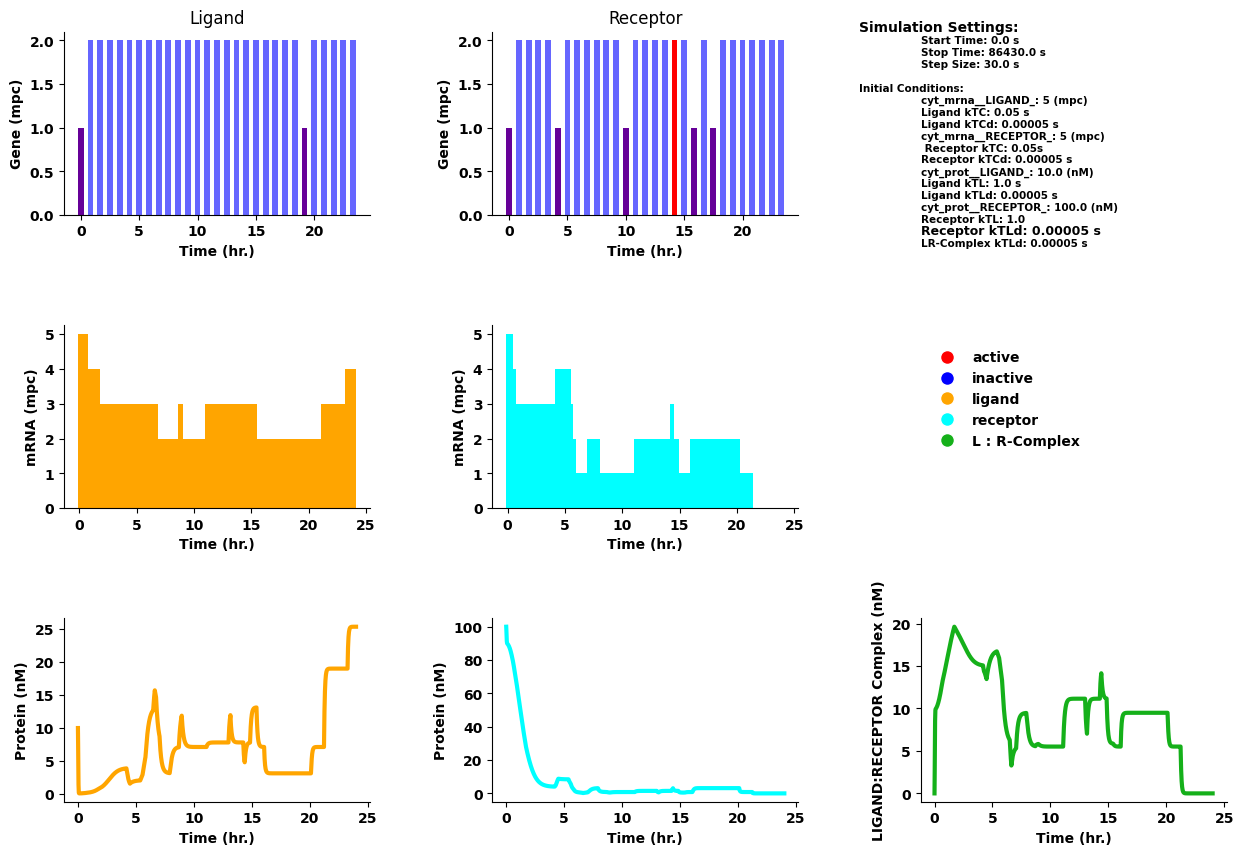

<Figure size 640x480 with 0 Axes>

In [7]:
headers = [
    'nuc_gene_a__LIGAND_',
    'nuc_gene_i__LIGAND_',
    'nuc_gene_a__RECEPTOR_',
    'nuc_gene_i__RECEPTOR_',
    'cyt_mrna__LIGAND_',
    'cyt_mrna__RECEPTOR_',
    'cyt_prot__LIGAND_',
    'cyt_prot__RECEPTOR_',
    'cyt_prot__LIGAND__RECEPTOR_'
]

fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(3, 3, figure=fig, hspace=0.6, wspace=0.4)

# mpl.rcParams['font.size'] = 16
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['axes.labelweight'] = 'bold'
mpl.rcParams['lines.linewidth'] = 3

stop = len(data.index)* 30.0
step = stop / len(data.index)

time = increase["index"]
start = time[0]
cyt_gene_a__ligand_init = decrease[headers[0]]
cyt_gene_a__receptor_init = decrease[headers[2]]
cyt_mrna_ligand_init = decrease[headers[4]][0]
cyt_mrna_receptor_init = decrease[headers[5]][0]
cyt_prot_ligand_init = decrease[headers[6]][0]
cyt_prot_receptor_init = decrease[headers[7]][0]

# === Top row (Bar plots comparing pairs) ===
ax1_0 = fig.add_subplot(gs[0, 0])
ax1_0.bar(time[::100]/3600, decrease[headers[0]][::100], color='red', label=headers[0], width=0.5)
ax1_0.bar(time[::100]/3600, decrease[headers[1]][::100], color='blue', alpha=0.6, label=headers[1], width=0.5)
ax1_0.set_title("Ligand")
ax1_0.set_ylabel("Gene (mpc)")
ax1_0.set_xlabel('Time (hr.)')
# ax1_0.legend(frameon = False)

ax1_1 = fig.add_subplot(gs[0, 1])
ax1_1.bar(time[::100]/3600, decrease[headers[2]][::100], color='red', label=headers[2], width=0.5)
ax1_1.bar(time[::100]/3600, decrease[headers[3]][::100], color='blue', alpha=0.6, label=headers[3], width=0.5)
ax1_1.set_title("Receptor")
ax1_1.set_ylabel("Gene (mpc)")
ax1_1.set_xlabel('Time (hr.)')
# ax1_1.legend(frameon = False, )

# === Middle row (Single line plots) ===
ax2_0 = fig.add_subplot(gs[1, 0])
ax2_0.bar(time/3600, decrease[headers[4]], color='orange', width=0.25)
ax2_0.set_ylabel("mRNA (mpc)")
ax2_0.set_xlabel('Time (hr.)')

ax2_1 = fig.add_subplot(gs[1, 1])
ax2_1.bar(time/3600, decrease[headers[5]], color='cyan', width=0.25)
ax2_1.set_ylabel("mRNA (mpc)")
ax2_1.set_xlabel('Time (hr.)')

# === Bottom row (Line plots) ===
ax3_0 = fig.add_subplot(gs[2, 0])  # Span full row
ax3_1 = fig.add_subplot(gs[2, 1])
ax3_2 = fig.add_subplot(gs[2, 2])
ax3_0.plot(time/3600, decrease[headers[6]], color='orange', label=headers[6])
ax3_0.set_ylabel("Protein (nM)")
ax3_0.set_xlabel('Time (hr.)')
ax3_1.plot(time/3600, decrease[headers[7]], color='cyan', label=headers[7])
ax3_1.set_ylabel("Protein (nM)")
ax3_1.set_xlabel('Time (hr.)')
ax3_2.plot(time/3600, decrease[headers[8]], color='#15b01a', label=headers[8])
ax3_2.set_ylabel("LIGAND:RECEPTOR Complex (nM)")
ax3_2.set_xlabel('Time (hr.)')

ax1_2 = fig.add_subplot(gs[0:2, 2])

ax1_2.text(-0.2, 1.0, "Simulation Settings: ", fontsize = 10)
ax1_2.text(0.0, 0.975, f"Start Time: {start} s", fontsize =7.5)
ax1_2.text(0.0, 0.95,f"Stop Time: {stop} s", fontsize = 7.5)
ax1_2.text(0.0, 0.925,f"Step Size: {step} s", fontsize = 7.5)

ax1_2.text(-0.2, 0.875, "Initial Conditions:", fontsize=7.5)
ax1_2.text(0.0, 0.85,f"cyt_mrna__LIGAND_: {cyt_mrna_ligand_init} (mpc)", fontsize = 7.5)
ax1_2.text(0.0, 0.825, "Ligand kTC: 0.05 s", fontsize=7.5)
ax1_2.text(0.0, 0.8, "Ligand kTCd: 0.00005 s", fontsize=7.5)
ax1_2.text(0.0, 0.775,f"cyt_mrna__RECEPTOR_: {cyt_mrna_receptor_init} (mpc)", fontsize = 7.5)
ax1_2.text(0.0, 0.75, " Receptor kTC: 0.05s", fontsize=7.5)
ax1_2.text(0.0, 0.725, "Receptor kTCd: 0.00005 s", fontsize=7.5)
ax1_2.text(0.0, 0.7, f"cyt_prot__LIGAND_: {cyt_prot_ligand_init} (nM)", fontsize=7.5)
ax1_2.text(0.0, 0.675, "Ligand kTL: 1.0 s", fontsize=7.5)
ax1_2.text(0.0, 0.65, "Ligand kTLd: 0.00005 s", fontsize=7.5)
ax1_2.text(0.0, 0.625, f"cyt_prot__RECEPTOR_: {cyt_prot_receptor_init} (nM)", fontsize=7.5)
ax1_2.text(0.0, 0.6, "Receptor kTL: 1.0", fontsize=7.5)
ax1_2.text(0.0, 0.575, "Receptor kTLd: 0.00005 s", fontsize=9)
ax1_2.text(0.0, 0.55, "LR-Complex kTLd: 0.00005 s", fontsize=7.5)

ax1_2.axis('off')

# Custom legend elements
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='active', markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='inactive', markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='ligand', markerfacecolor='orange', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='receptor', markerfacecolor='cyan', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='L : R-Complex', markerfacecolor='#15b01a', markersize=10)
]

# Add legend manually to ax1_2
ax1_2.legend(handles=legend_elements, loc='lower left', bbox_to_anchor=(0, 0.10), frameon=False, fontsize=10)


sns.despine(fig)

# Final touches
# fig.suptitle("Gene Expression and Interaction Overview", fontsize=16, y=0.95)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
plt.savefig(fname = "/home/jonah/Desktop/sim-results/ktC-x0.1-LR-Model.png", dpi = 300)

## Correlation Plot

Analyzing the quotient result of increasing and decreasing transcriptional activation by 10-fold

[0.0143238  0.01454611 0.04285159 ... 1.09288429 1.04693045 1.04438941]


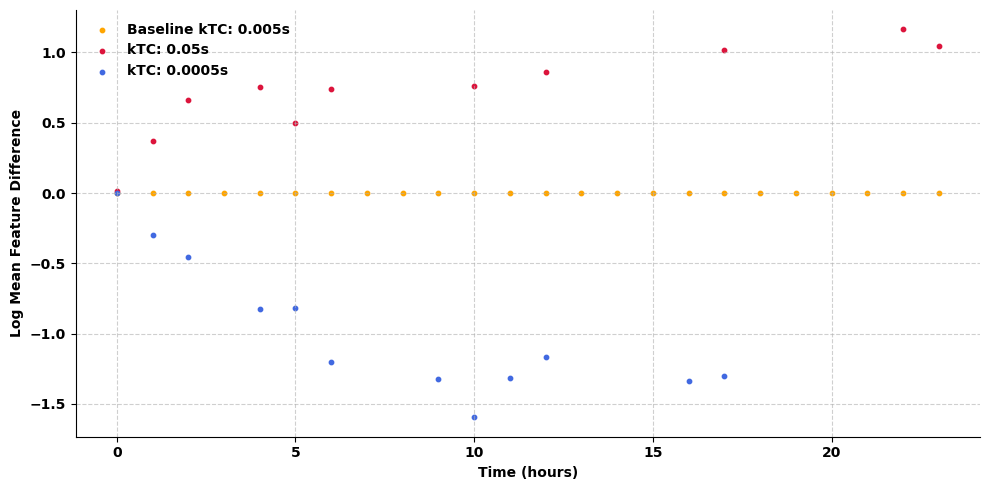

In [43]:
self_matrix = data[4:] / data[4:]
base_level = np.mean(self_matrix - self_matrix, axis=1) # feature-wide mean difference

increase_matrix = increase[4:] / data[4:]
with np.errstate(divide='ignore', invalid='ignore'):
    ratio = (increase_matrix - self_matrix) / self_matrix
    logfc = np.log1p(np.where(self_matrix != 0, ratio, np.nan))
increase_comparison = np.nanmean(logfc, axis=1)

decrease_matrix = decrease[4:] / data[4:]
with np.errstate(divide='ignore', invalid='ignore'):
    ratio = (decrease_matrix - self_matrix) / self_matrix
    logfc = np.log1p(np.where(self_matrix != 0, ratio, np.nan))
decrease_comparison = np.nanmean(logfc, axis=1)

time = data["index"] / 3600.0

# Sampling interval for clarity (every 120th point)
sample_interval = 120
time_sampled = time[:-1:sample_interval]

# Optional: smoothing (uncomment to enable)
# from scipy.ndimage import uniform_filter1d
# increase_comparison = uniform_filter1d(increase_comparison, size=5)
# decrease_comparison = uniform_filter1d(decrease_comparison, size=5)

print(increase_comparison)
# Plot
plt.figure(figsize=(10, 5))
plt.scatter(time_sampled, base_level[::sample_interval], color="orange", s=10, label="Baseline kTC: 0.005s")
plt.scatter(time_sampled, increase_comparison[::sample_interval], color="crimson", s=10, label="kTC: 0.05s")
plt.scatter(time_sampled, decrease_comparison[::sample_interval], color="royalblue", s=10, label="kTC: 0.0005s")
# plt.yscale('log')
# Decorations
# plt.title("Mean Feature-Wide Difference from Baseline Over Time")
plt.xlabel("Time (hours)")
plt.ylabel("Log Mean Feature Difference")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(frameon=False)
plt.tight_layout()
sns.despine()
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(time_sampled, base_level[::sample_interval], color="gray", s=10, label="Baseline")
plt.scatter(time_sampled, increase_comparison[::sample_interval], color="crimson", s=10, label="Increase vs. Base")
plt.scatter(time_sampled, decrease_comparison[::sample_interval], color="royalblue", s=10, label="Decrease vs. Base")

# plt.yscale('log')
plt.xlabel("Time (hours, log scale)")
plt.ylabel("Mean Feature Difference")
plt.title("Mean Feature-Wide Difference from Baseline Over Log-Time")

# Highlight regions
plt.axvspan(0.01, 0.1, color='gray', alpha=0.05)
plt.axvspan(0.1, 1, color='blue', alpha=0.03)
plt.axvspan(1, 10, color='red', alpha=0.03)

# Decorations
plt.grid(True, which='both', linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()
